## DSCI 100 007 Group 37

- #####  Preliminary exploratory data analysis

In [15]:
install.packages("psych")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
library(tidyverse)
library(ggplot2)
library(psych)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(repr)

##### Step 1 : read data from url

In [17]:
path <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <-read_csv(path)
heart_disease_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Step 2 : Naming and filtering data

In [18]:
# Give each column a specific name from given dataset
heart_disease_data <- read_csv(path, col_names = FALSE) |> 
  set_names(c("age", "sex", "cp", "trestbpd", "chol", "fbs", "restecg", "thalach",
              "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [19]:
# Now let's add a new column that includes the number of patients.
heart_disease_data <- heart_disease_data |>
  mutate(patient_number = row_number()) |>
  select(patient_number, everything())
heart_disease_data

patient_number,age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [20]:
# We will use the select function to keep only the variables trestbps (#4) the  and cholesterol (#5), 
# and num (#14) the predicted heart disease outcome.
filtered_heart_disease_data <- heart_disease_data |>
  select(1, 5, 10, 15)
filtered_heart_disease_data

patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<dbl>
1,145,0,0
2,160,1,2
3,120,1,1
⋮,⋮,⋮,⋮
301,130,1,3
302,130,0,1
303,138,0,0


In [21]:
# We want to change column 14 to be only 0 (no to heart disease) and 1 (1 and above is yes to heart disease)
changed_num <- filtered_heart_disease_data |>
  mutate(num = ifelse(num >= 1, 1, 0))
# remove all row with '?'
changed_num_1 <- changed_num |>
  filter_all(all_vars(. != "?"))
changed_num_1

patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<dbl>
1,145,0,0
2,160,1,1
3,120,1,1
⋮,⋮,⋮,⋮
301,130,1,1
302,130,0,1
303,138,0,0


In [22]:
# final dataframe 
final_data_1 <- changed_num_1

final_data_1 <- final_data_1 |>
    mutate(num = as_factor(num))
final_data_1

patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<fct>
1,145,0,0
2,160,1,1
3,120,1,1
⋮,⋮,⋮,⋮
301,130,1,1
302,130,0,1
303,138,0,0


In [23]:
# shows
head(final_data_1,10)
trestbpd_dbl <- final_data_1 |>
    mutate(trestbpd = as.numeric(trestbpd))

final_data_2 <- trestbpd_dbl |>
    mutate(exang = as.numeric(exang))
final_data_2

patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<fct>
1,145,0,0
2,160,1,1
3,120,1,1
⋮,⋮,⋮,⋮
8,120,1,0
9,130,0,1
10,140,1,1


patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<fct>
1,145,0,0
2,160,1,1
3,120,1,1
⋮,⋮,⋮,⋮
301,130,1,1
302,130,0,1
303,138,0,0


In [24]:
set.seed(9999)

heart_disease_split <- initial_split(final_data_2, prop = 0.75, strata = num)
heart_disease_training <- training(heart_disease_split)
heart_disease_testing <- testing(heart_disease_split)
heart_disease_training
heart_disease_testing

patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<fct>
1,145,0,0
4,130,0,0
5,130,0,0
⋮,⋮,⋮,⋮
298,140,1,1
299,110,0,1
301,130,1,1


patient_number,trestbpd,exang,num
<int>,<dbl>,<dbl>,<fct>
2,160,1,1
8,120,1,0
9,130,0,1
⋮,⋮,⋮,⋮
300,144,0,1
302,130,0,1
303,138,0,0


In [25]:
describe(heart_disease_training)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
patient_number,1,227,150.6343612,86.0285159,153,150.7377049,108.2298,1,301,300,-0.03128286,-1.1991285,5.70991314
trestbpd,2,227,131.7973568,18.1557517,130,130.5464481,14.8260,94,200,106,0.72722291,0.9437541,1.20503957
exang,3,227,0.3480176,0.4773943,0,0.3114754,0.0000,0,1,1,0.63391140,-1.6051694,0.03168577
num*,4,227,1.4581498,0.4993466,1,1.4480874,0.0000,1,2,1,0.16688152,-1.9808185,0.03314280


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


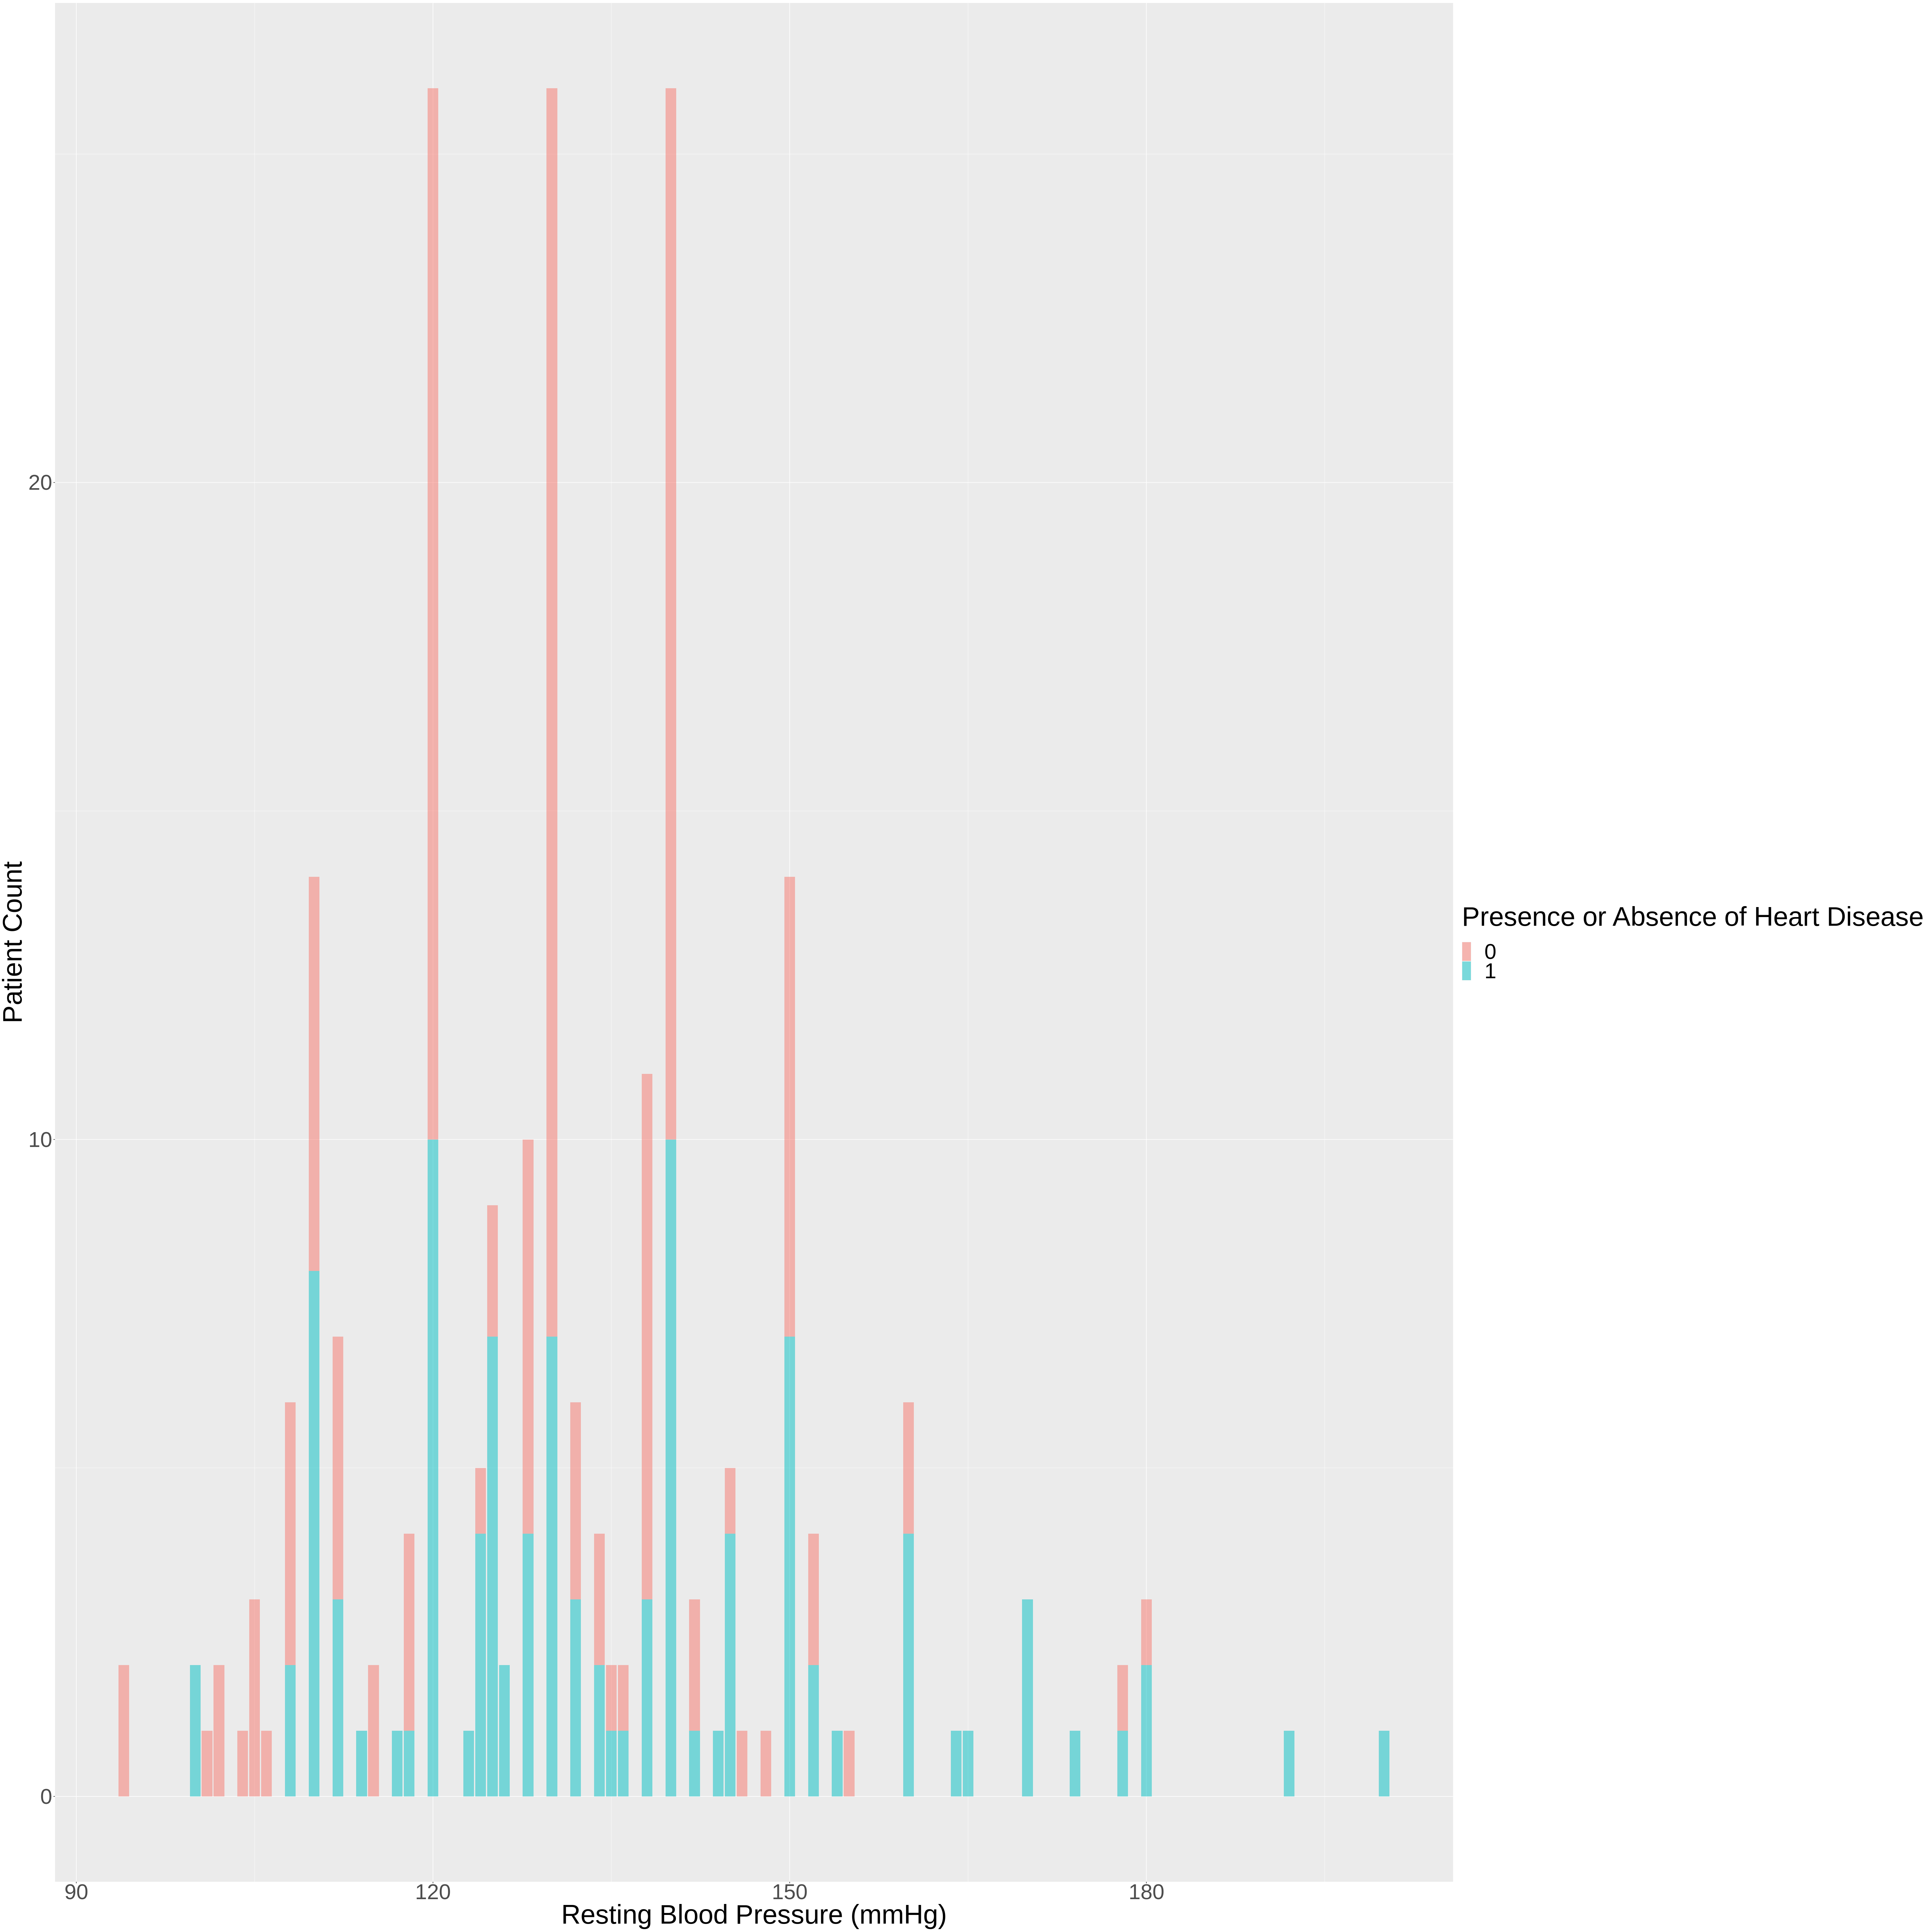

In [55]:
#histogram graph representing whether a patient has heart disease or not categorized based on their resting blood pressure
options(repr.plot.width = 50, repr.plot.height = 50)
trestbpd_hist <- heart_disease_training |>
    ggplot(aes(x = trestbpd, fill = num))+
    geom_histogram(stat = "count", alpha = 0.5) +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Patient Count", fill = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 50))
trestbpd_hist

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


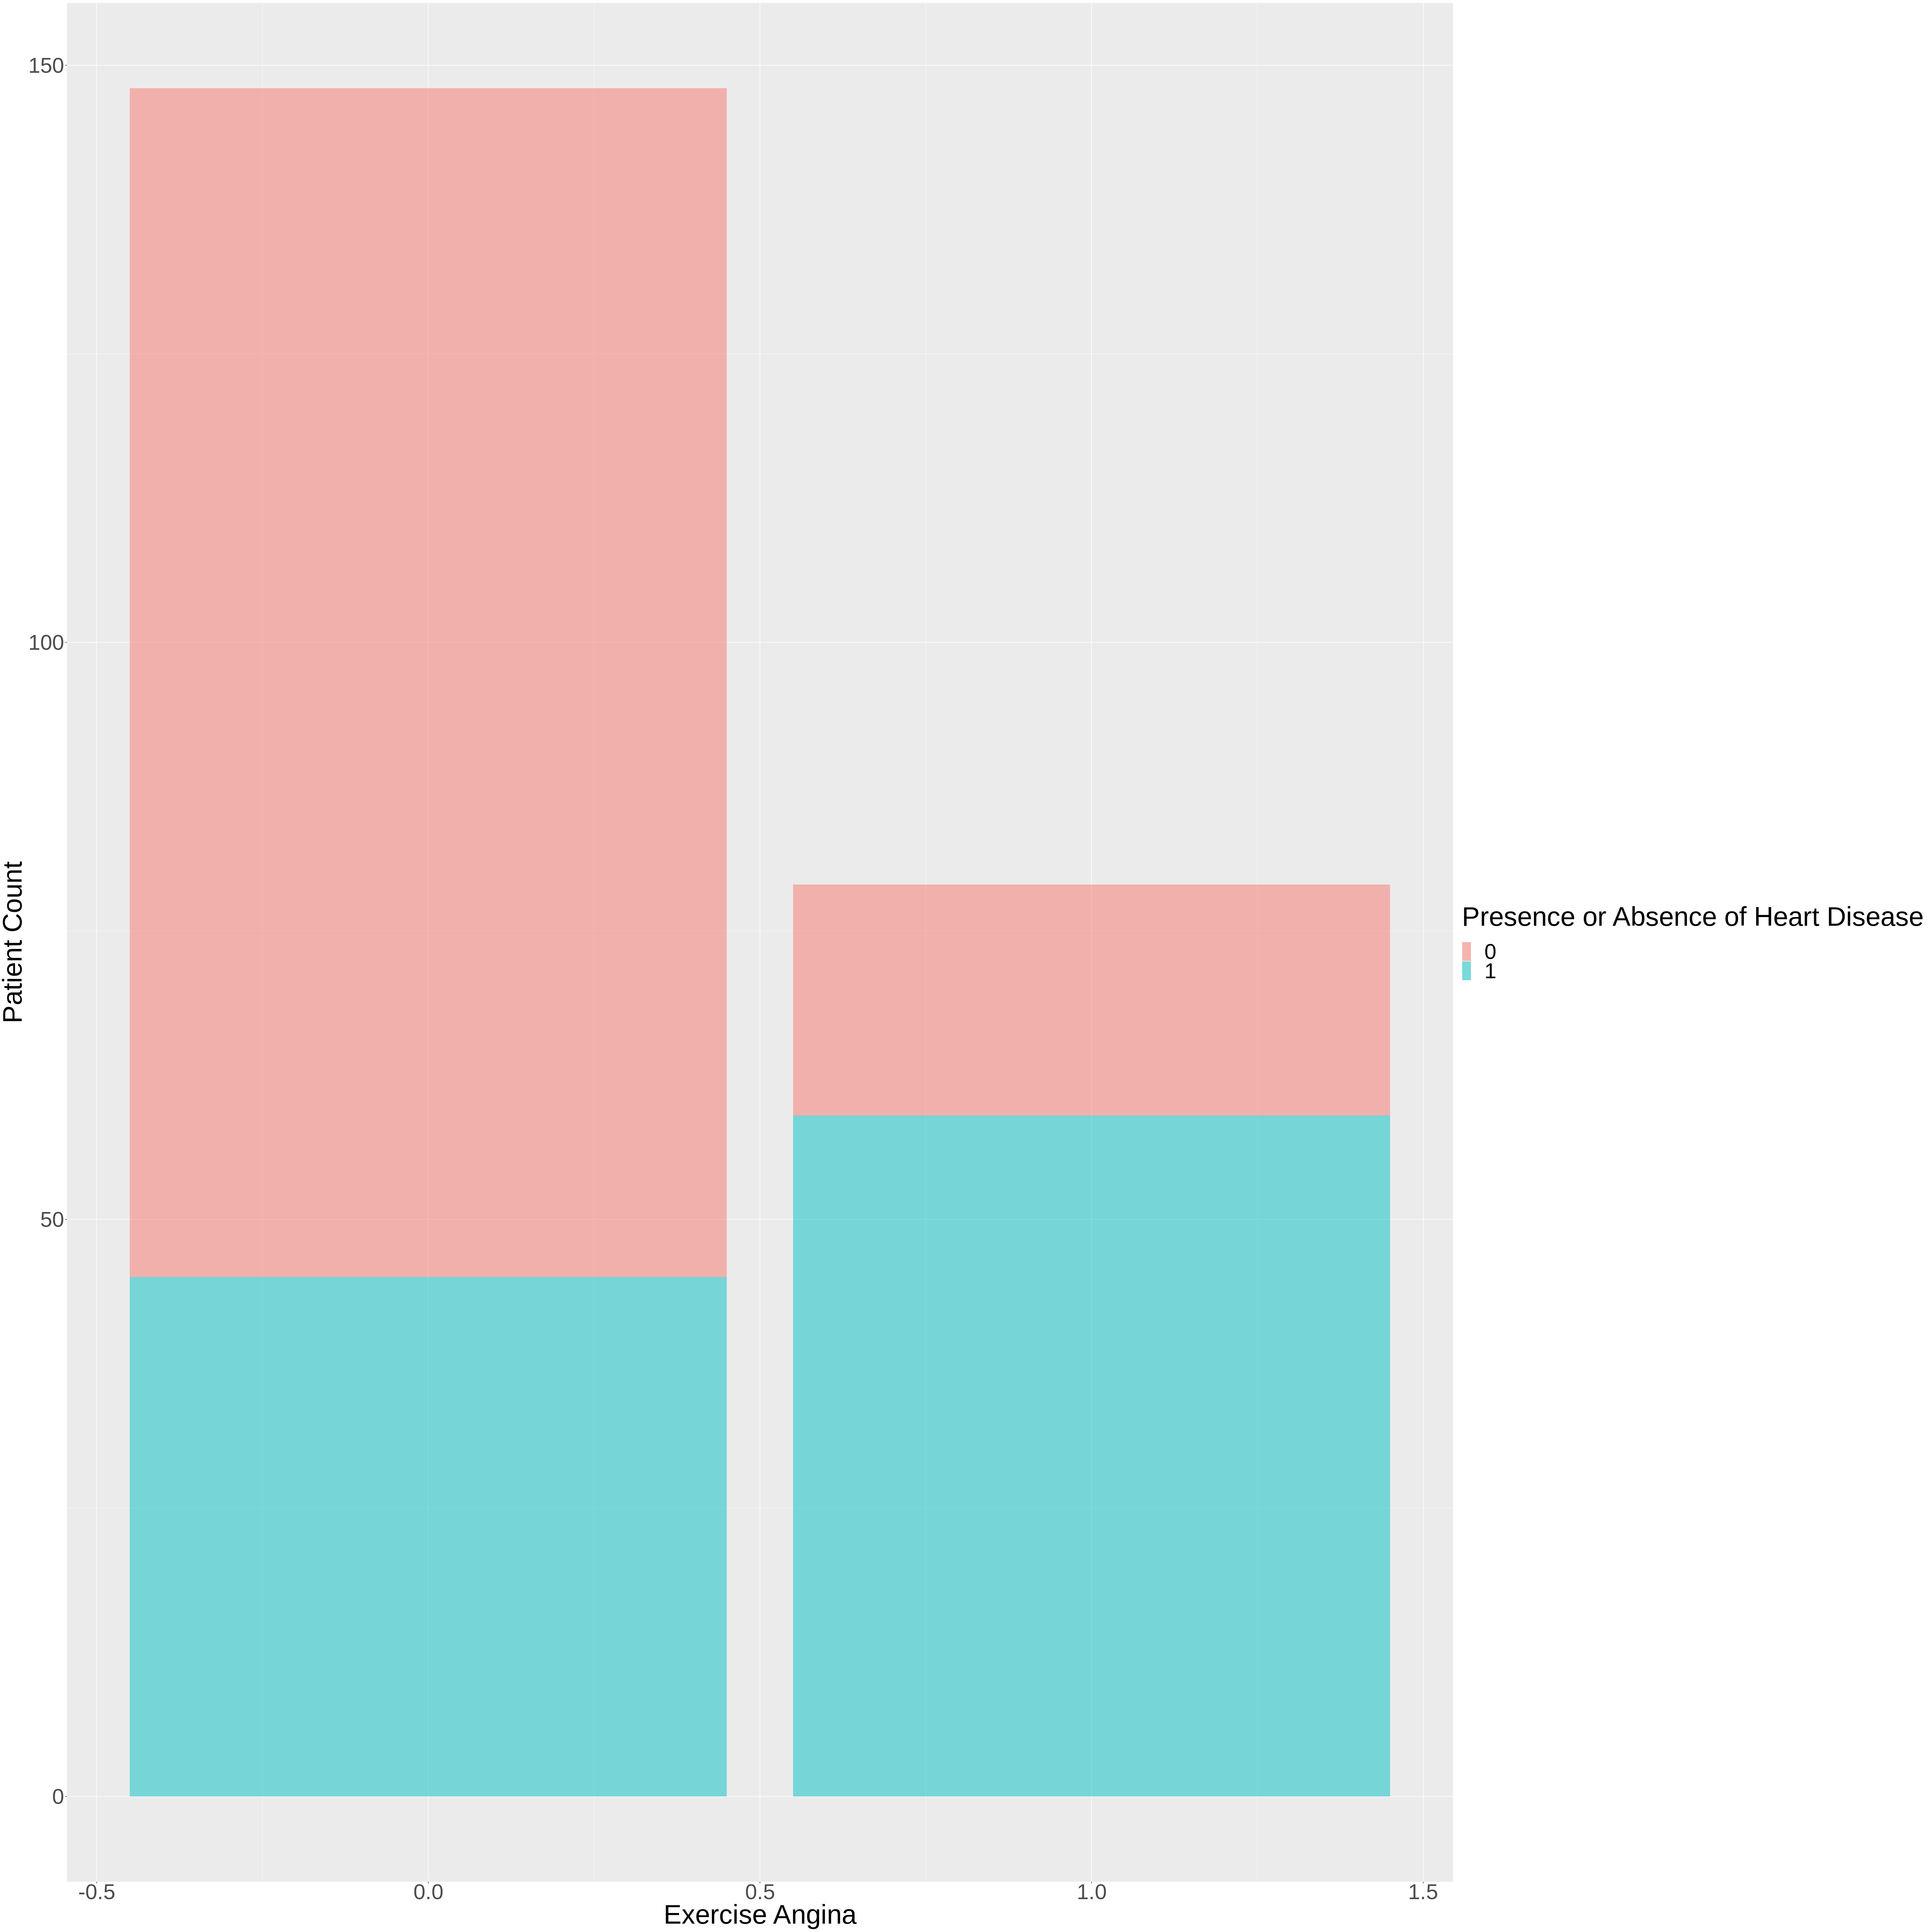

In [56]:
#histogram graph representing whether a patient with or without exercise angina has heart disease or not 
options(repr.plot.width = 50, repr.plot.height = 50)
exang_hist <- heart_disease_training |>
    ggplot(aes(x = exang, fill = num))+
    geom_histogram(stat = "count", alpha = 0.5) +
    labs(x = "Exercise Angina", y = "Patient Count", fill = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 50))
exang_hist

In [28]:
#everything after this part is for if we use cholesterol and resting blood pressure

filtered_heart_disease_data1 <- heart_disease_data |>
  select(1, 5, 6, 15)
filtered_heart_disease_data1

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<dbl>
1,145,233,0
2,160,286,2
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,3
302,130,236,1
303,138,175,0


In [30]:
changed_num1 <- filtered_heart_disease_data1 |>
  mutate(num = ifelse(num >= 1, 1, 0))
# remove all row with '?'
changed_num_11 <- changed_num1 |>
  filter_all(all_vars(. != "?"))
changed_num_11

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<dbl>
1,145,233,0
2,160,286,1
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,1
302,130,236,1
303,138,175,0


In [31]:
final_data_with_chol <- changed_num_11
final_data_with_chol <- final_data_with_chol |>
    mutate(num = as_factor(num))
final_data_with_chol

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
1,145,233,0
2,160,286,1
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,1
302,130,236,1
303,138,175,0


In [32]:
set.seed(9999)

heart_disease_split1 <- initial_split(final_data_with_chol, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split1)
heart_disease_test <- testing(heart_disease_split1)
heart_disease_train
heart_disease_test

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
1,145,233,0
4,130,250,0
5,130,204,0
⋮,⋮,⋮,⋮
298,140,241,1
299,110,264,1
301,130,131,1


patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
2,160,286,1
8,120,354,0
9,130,254,1
⋮,⋮,⋮,⋮
300,144,193,1
302,130,236,1
303,138,175,0


In [34]:
describe(heart_disease_train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
patient_number,1,227,150.63436,86.0285159,153,150.737705,108.2298,1,301,300,-0.03128286,-1.1991285,5.7099131
trestbpd,2,227,131.79736,18.1557517,130,130.546448,14.8260,94,200,106,0.72722291,0.9437541,1.2050396
chol,3,227,246.56388,53.8300268,240,244.049180,50.4084,126,564,438,1.17388445,4.7696730,3.5728244
num*,4,227,1.45815,0.4993466,1,1.448087,0.0000,1,2,1,0.16688152,-1.9808185,0.0331428


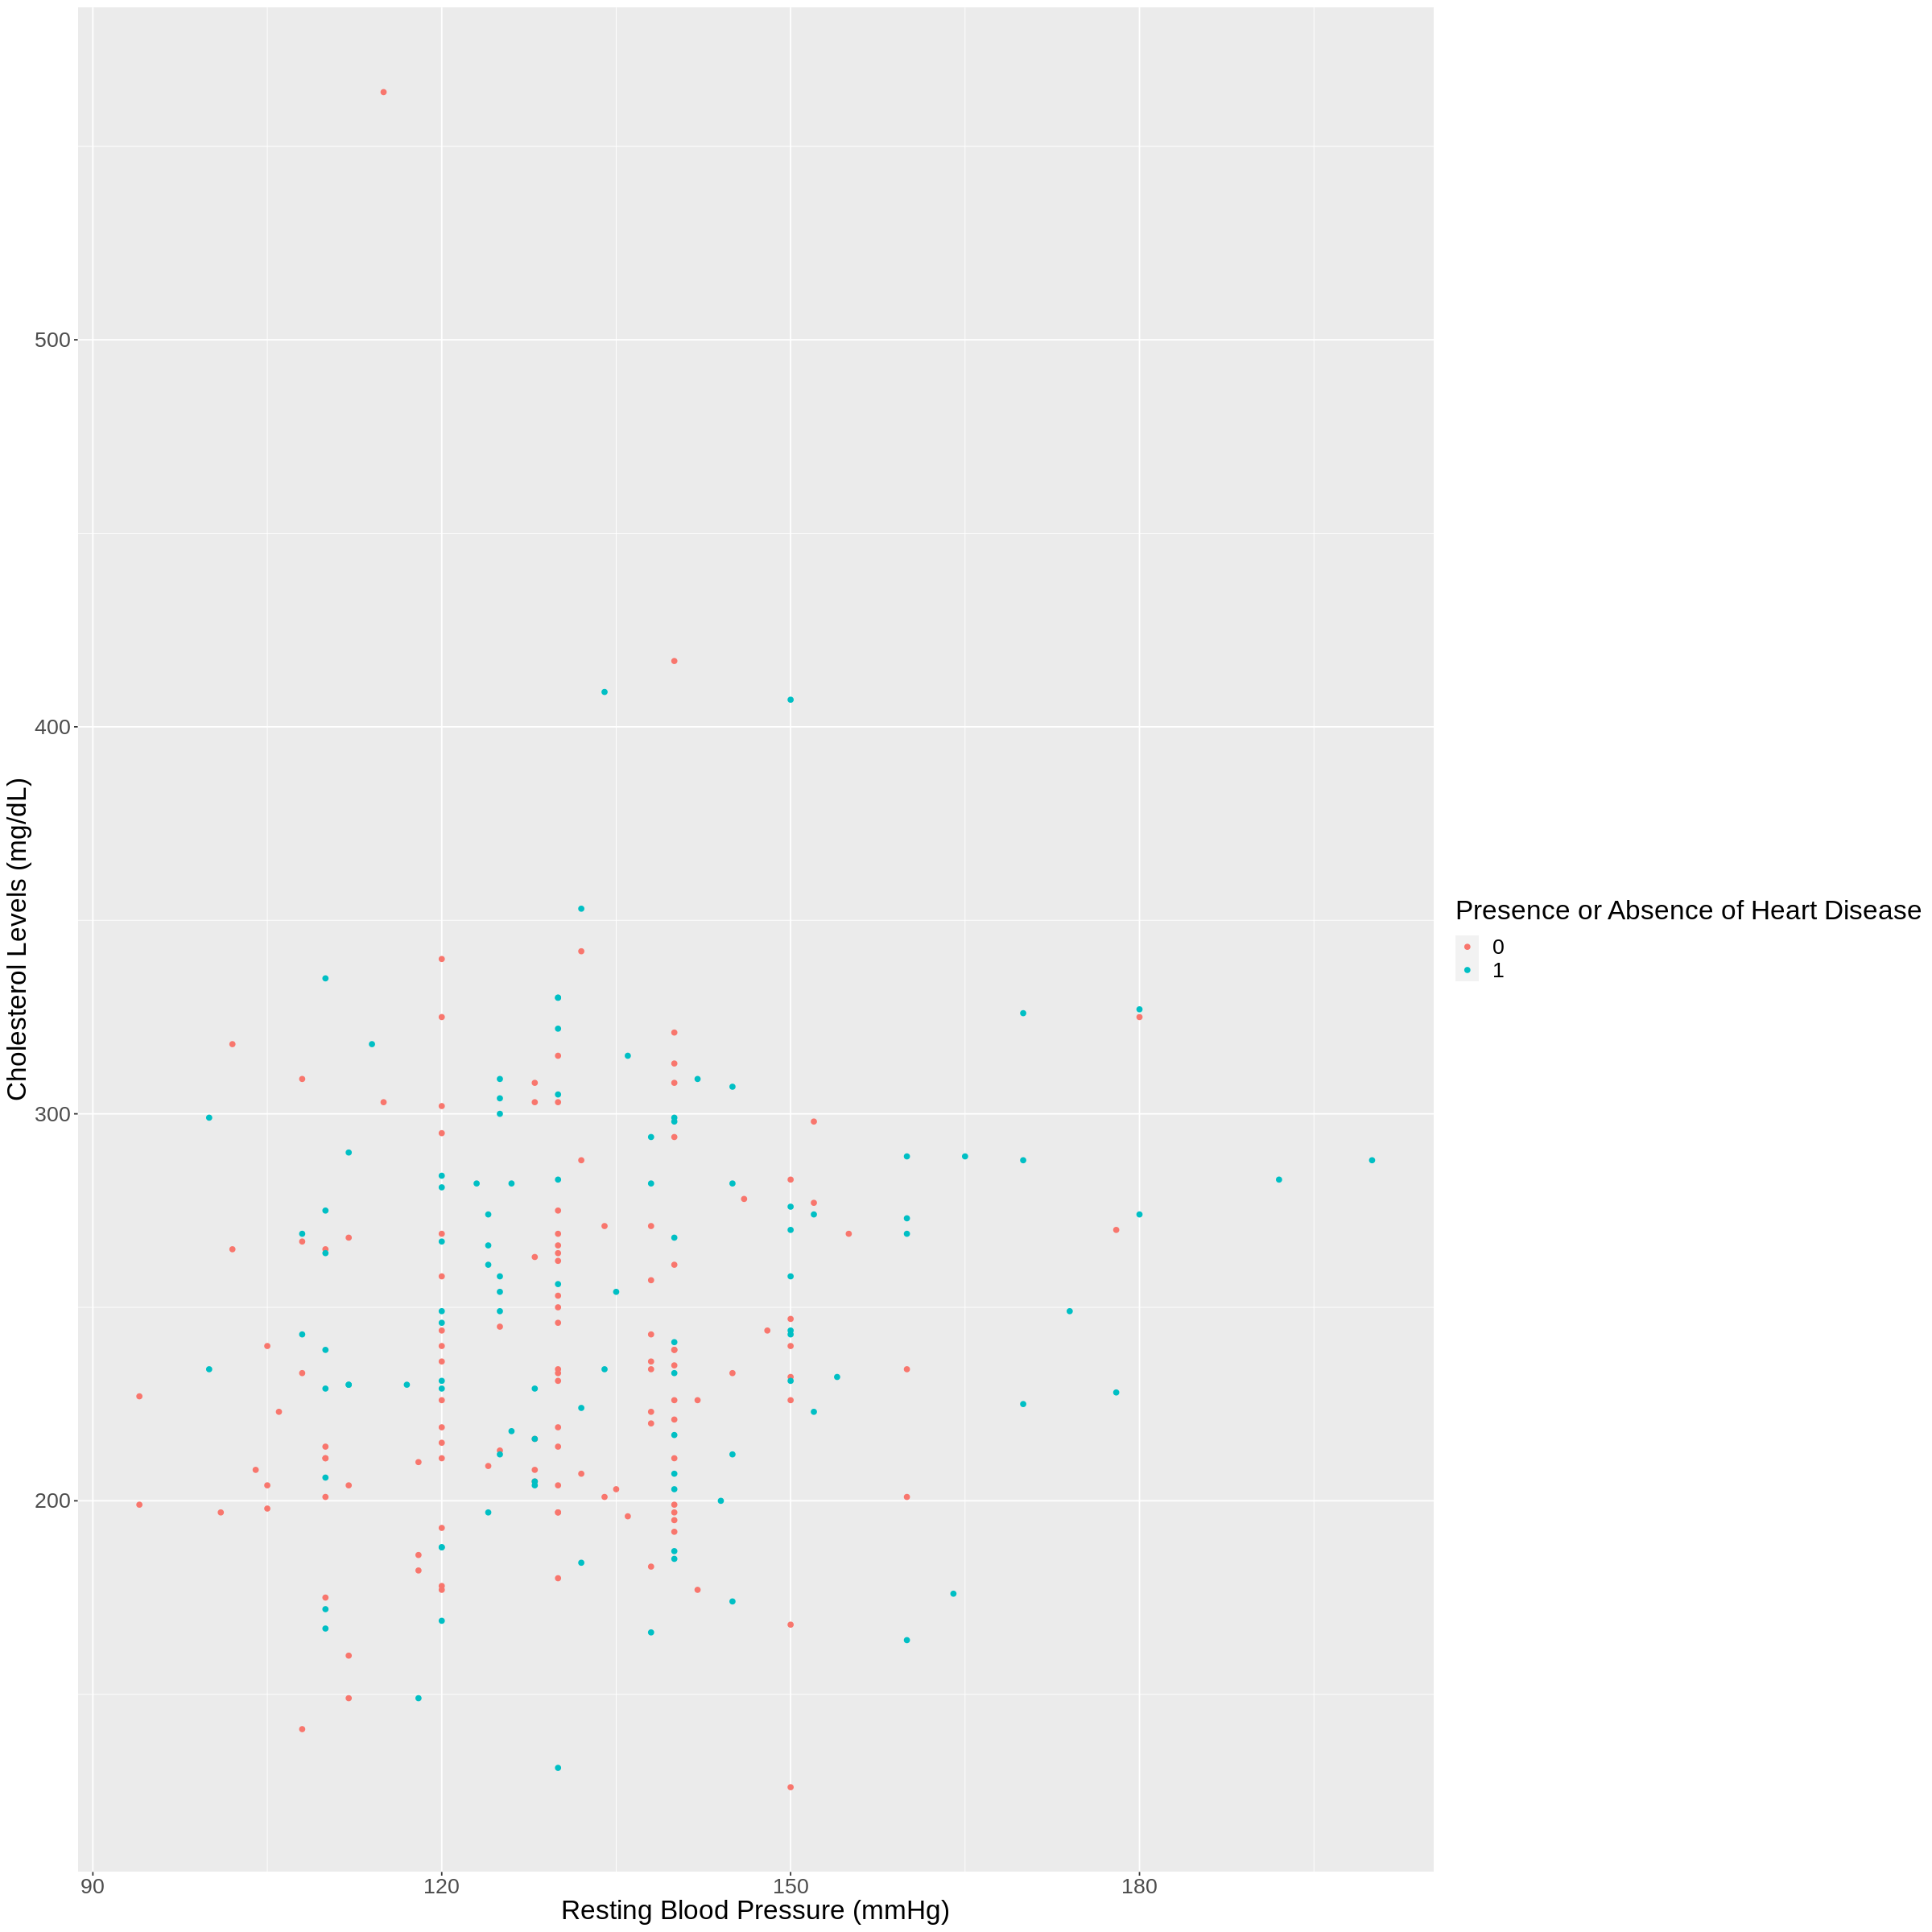

In [54]:
#scatterplot visualising the relationship between cholesterol, resting blood pressure, and heart disease
options(repr.plot.width = 20, repr.plot.height = 20)
heart_disease_plot <- heart_disease_train |>
    ggplot(aes(x = trestbpd, y = chol, color = num))+
    geom_point() +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Cholesterol Levels (mg/dL)", colour = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 20))
heart_disease_plot

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


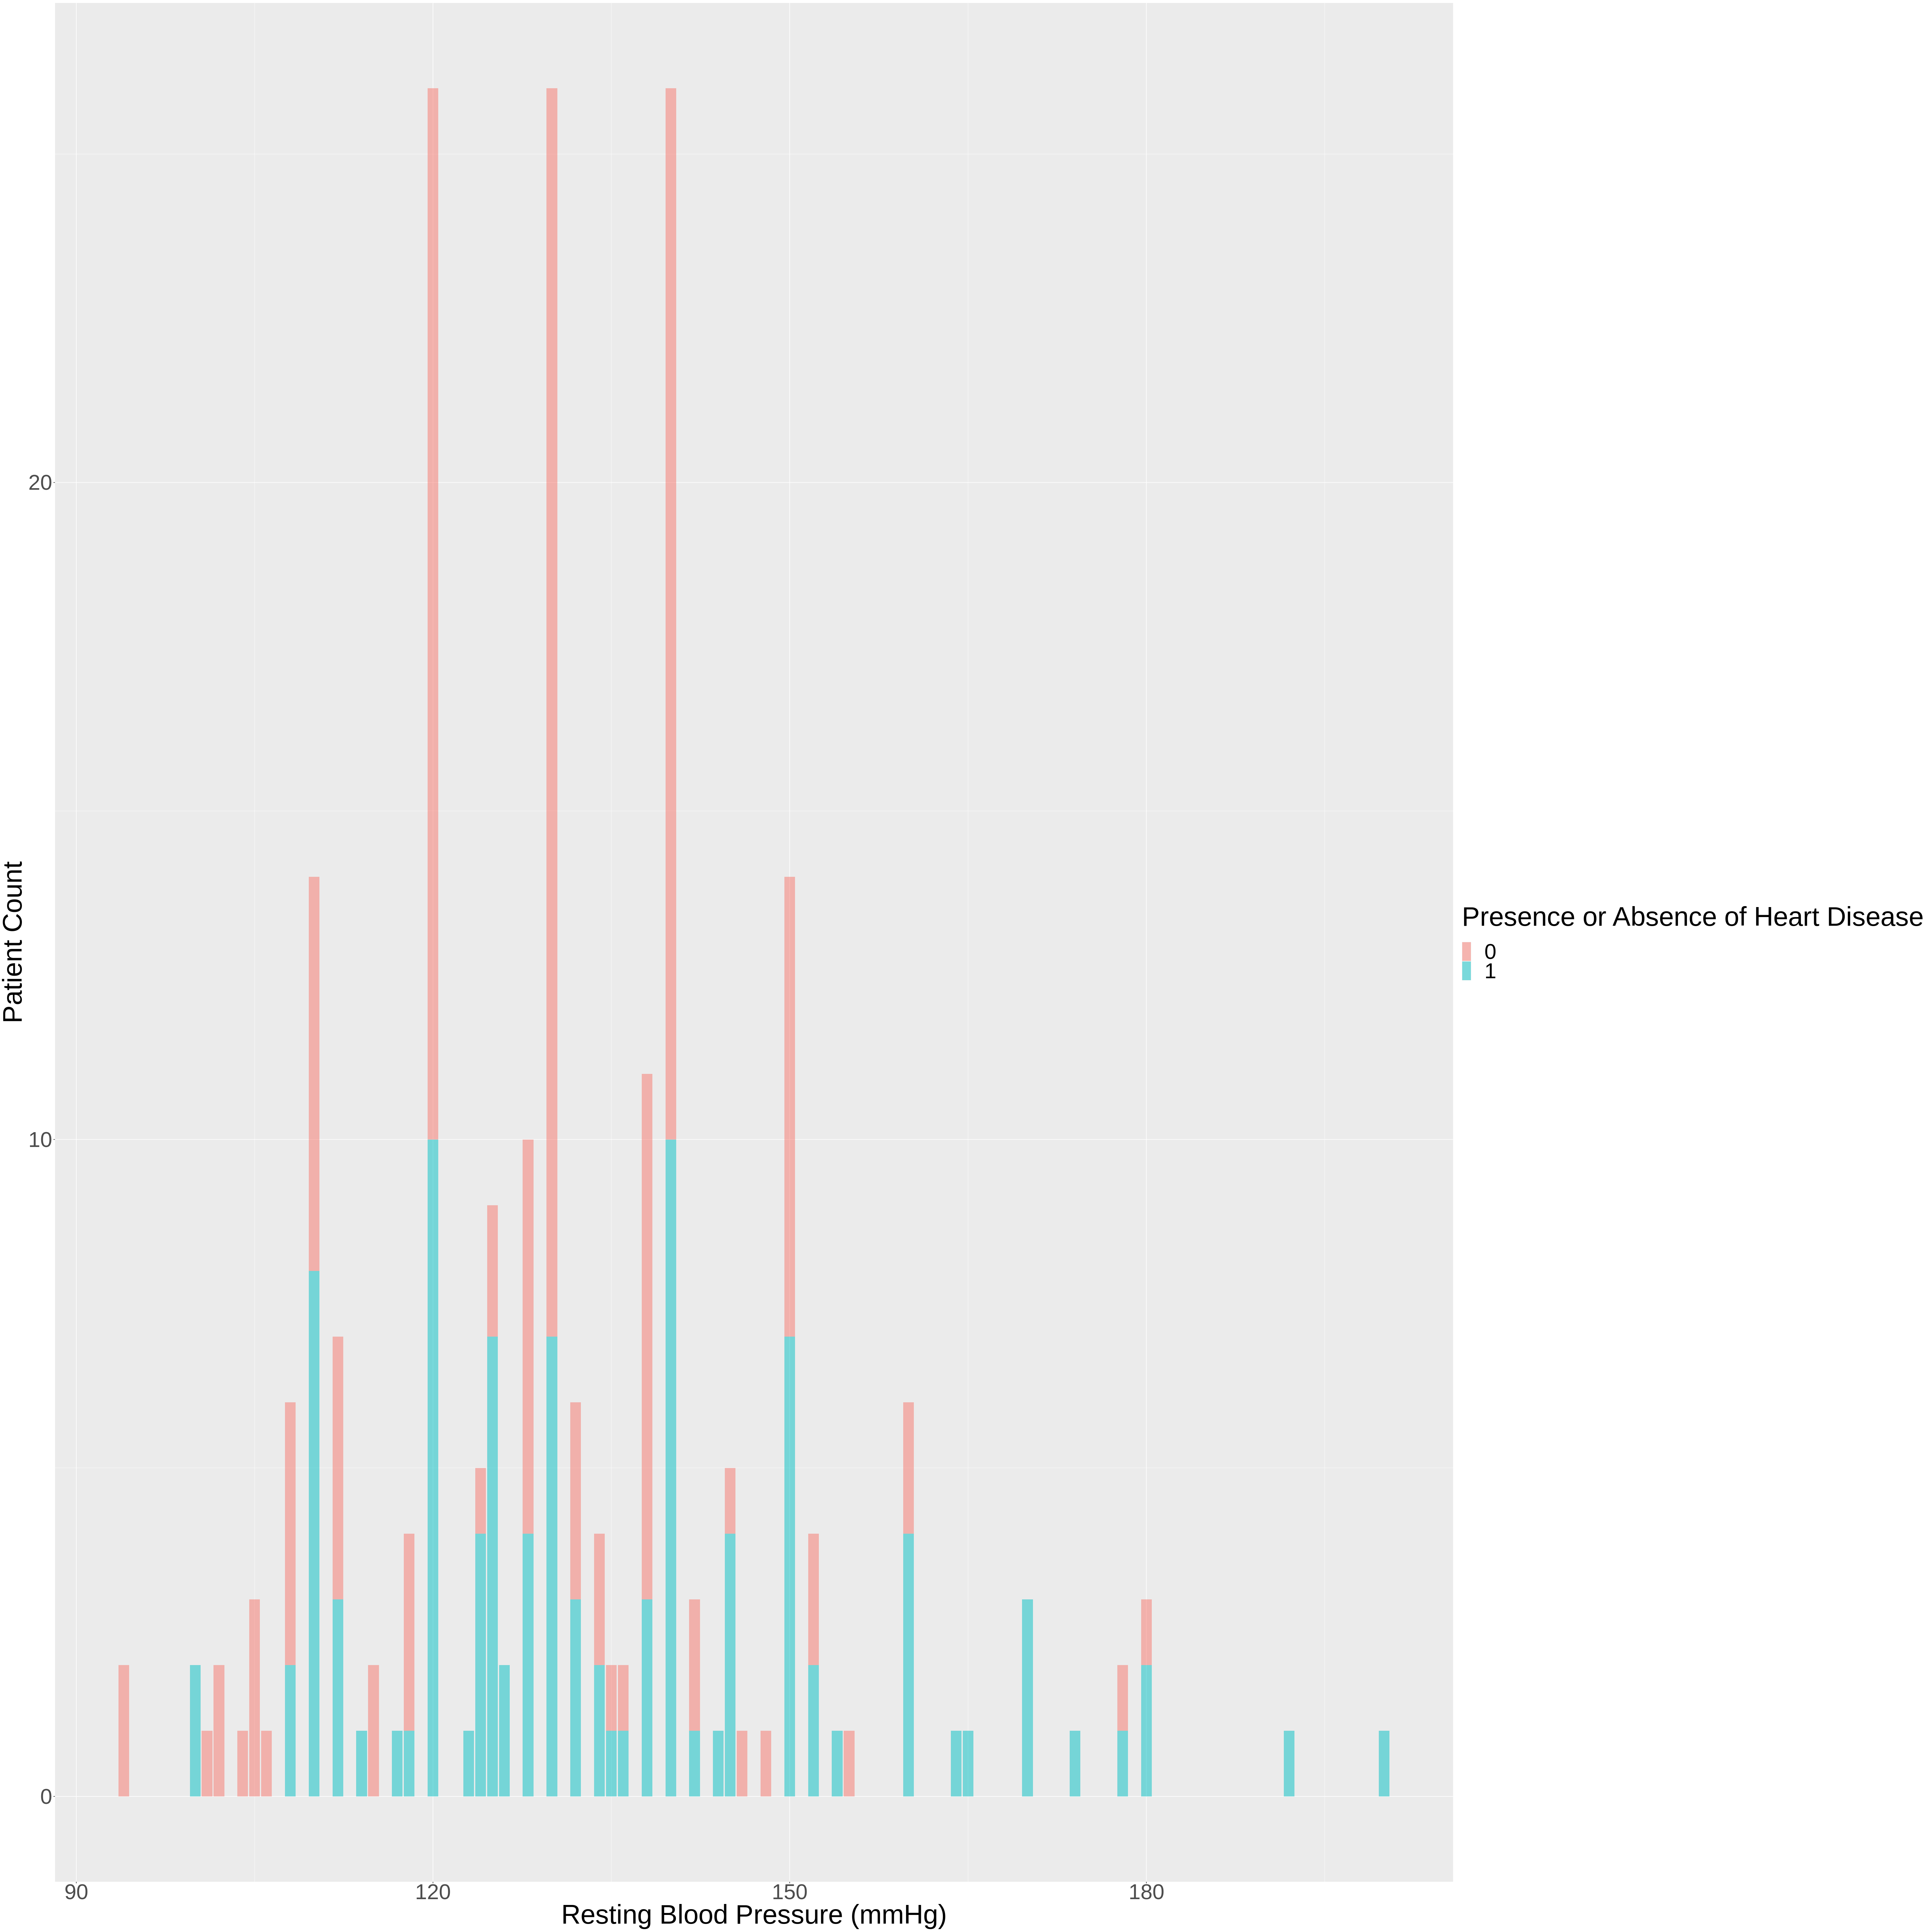

In [50]:
#histogram graph representing whether a patient has heart disease or not categorized based on their resting blood pressure

options(repr.plot.width = 50, repr.plot.height = 50)
trestbpd_hist1 <- heart_disease_train |>
    ggplot(aes(x = trestbpd, fill = num))+
    geom_histogram(stat = "count", alpha = 0.5) +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Patient Count", fill = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 50))
trestbpd_hist1

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


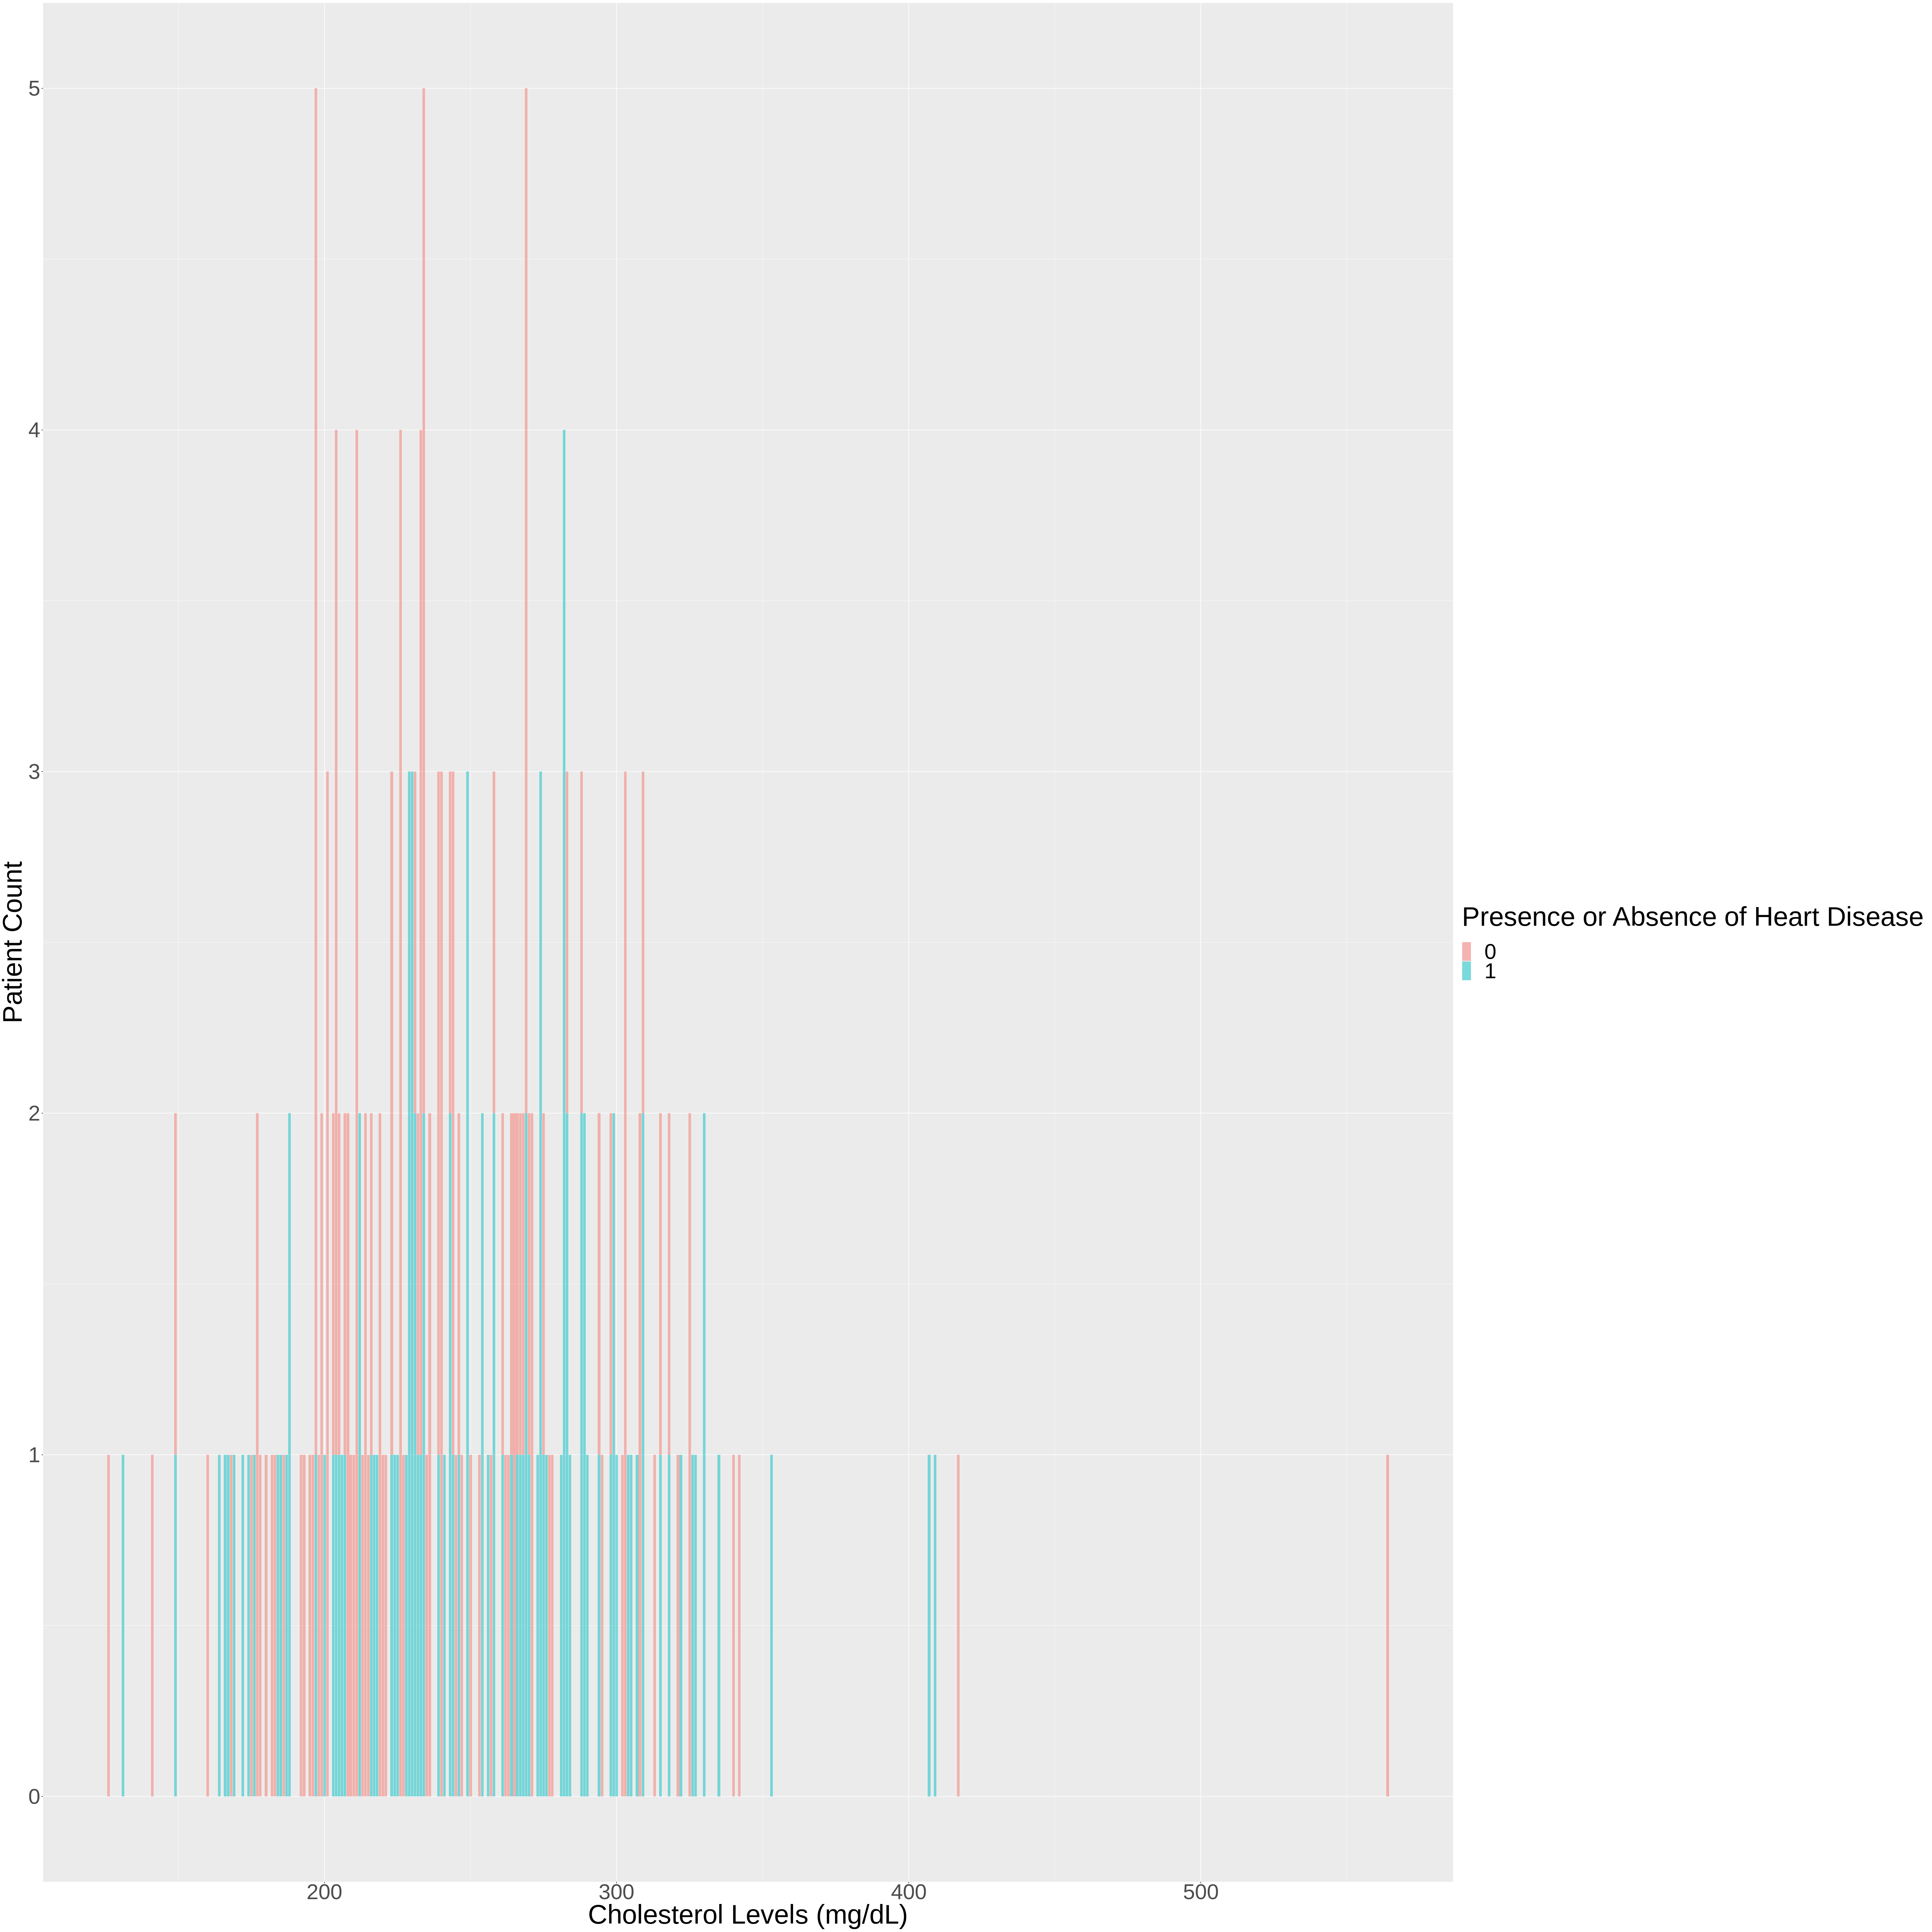

In [60]:
#histogram graph showing patients' cholesterol levels and whether they have heart disease or not 

options(repr.plot.width = 50, repr.plot.height = 50)

chol_hist <- heart_disease_train |>
    ggplot(aes(x = chol, fill = num))+
    geom_histogram(stat = "count", alpha = 0.5) +
    labs(x = "Cholesterol Levels (mg/dL)", y = "Patient Count", fill = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 50))
chol_hist